In [5]:
import torch
import torch.nn.functional as F ## 激励函数
import matplotlib.pyplot as plt

### 模拟数据
使用一些假数据来模拟真实情况

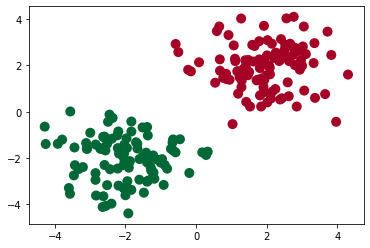

In [6]:
## make fake data
n_data=torch.ones(100,2)
x0=torch.normal(n_data*2,1)  #class0 x data, shape=(100,2)
y0=torch.zeros(100)        #class0 y data, shape=(100,)  标签
x1=torch.normal(-2*n_data,1) #class1 x data, shape=(100,2)
y1=torch.ones(100)         ##class0 y data, shape=(100,)  标签

#将两个张量拼接在一起
x=torch.cat((x0,x1),0).type(torch.FloatTensor) #shape(200,2), 32-bit floation
y=torch.cat((y0,y1),).type(torch.LongTensor)  #shape(200), 64-bit integer

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

##### ___init__()定义所有层的属性
##### forward(x) 搭建层与层之间的关系链接，建立关系时，需要用到激励函数

In [7]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.out=torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.out(x)
        return x

#几个特征就是多少个input和output
net=Net(2,10,2)
net

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)

## Training

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


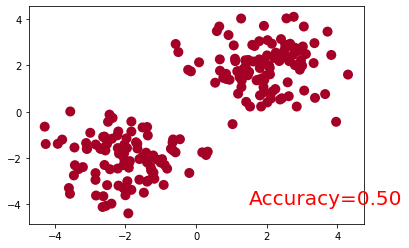

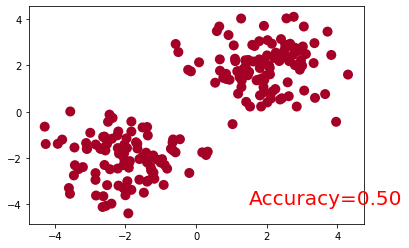

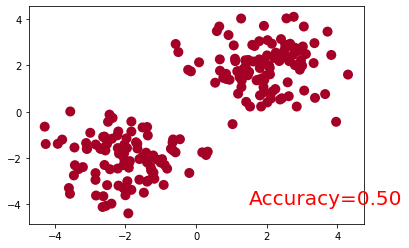

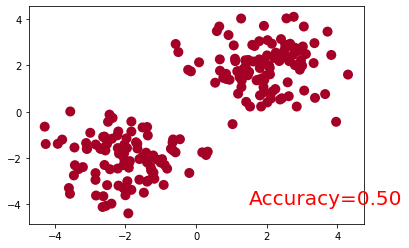

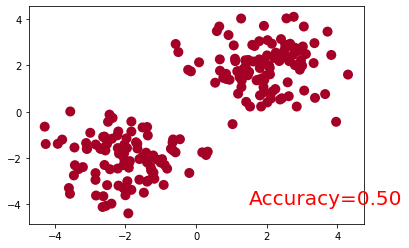

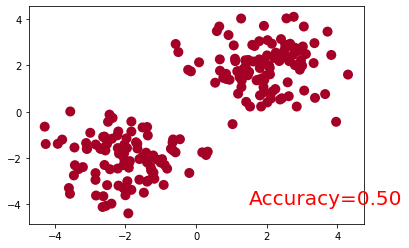

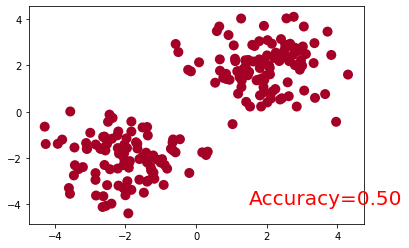

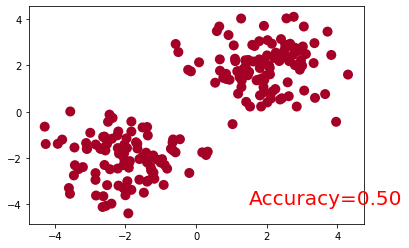

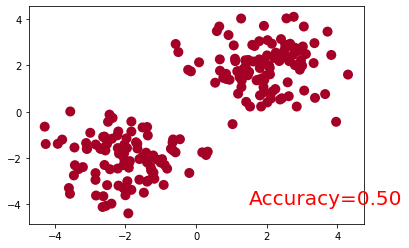

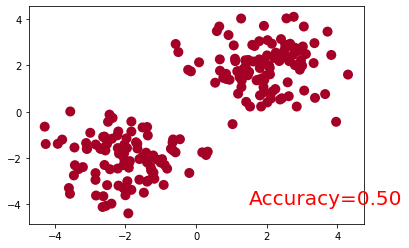

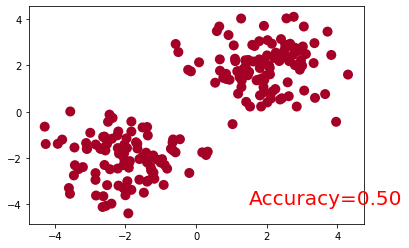

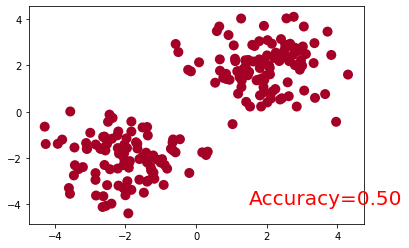

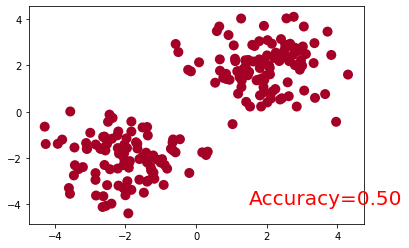

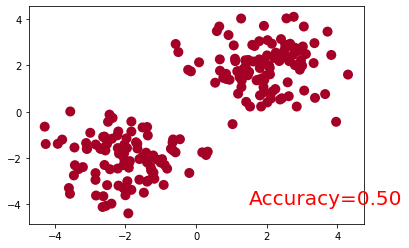

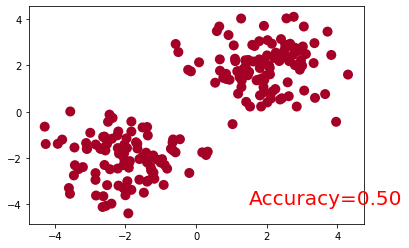

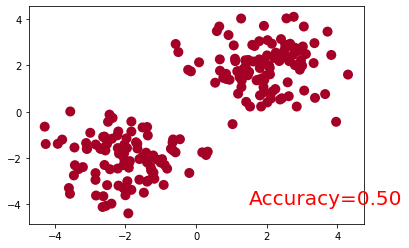

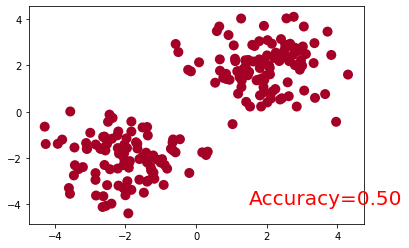

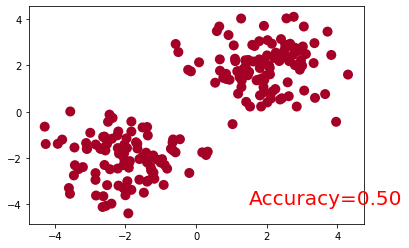

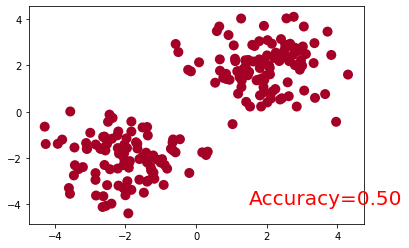

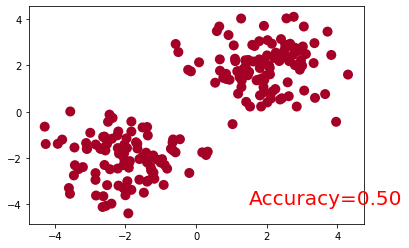

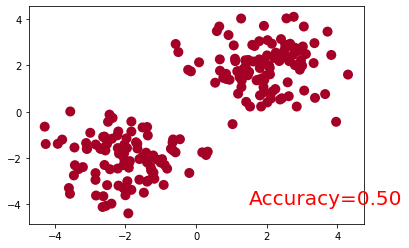

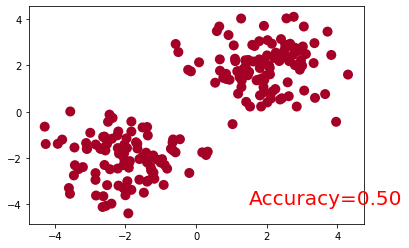

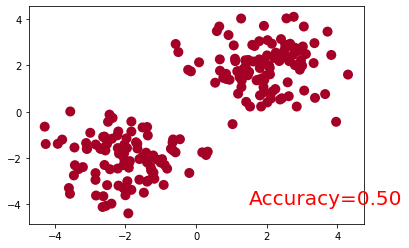

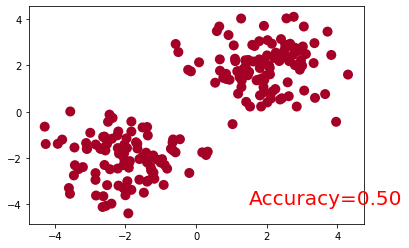

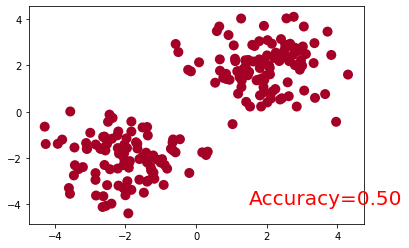

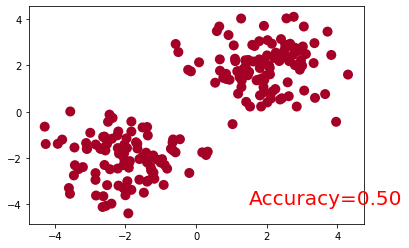

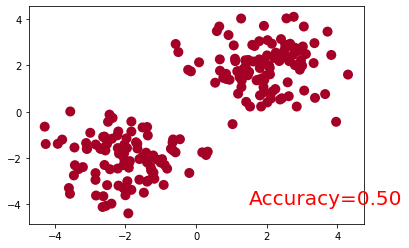

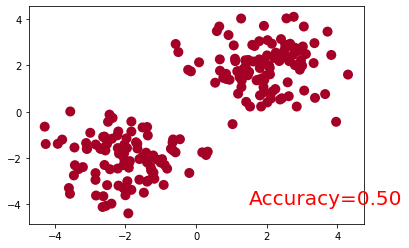

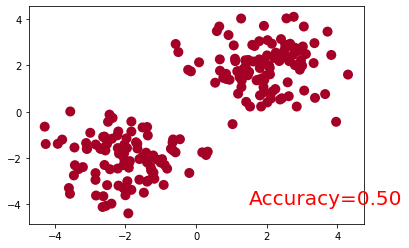

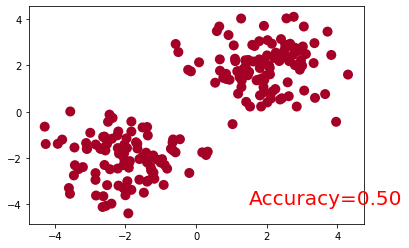

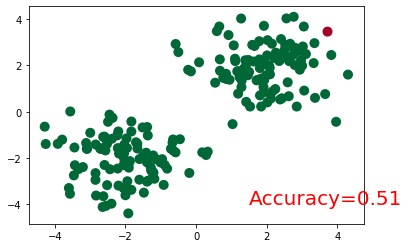

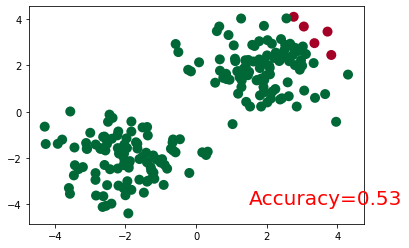

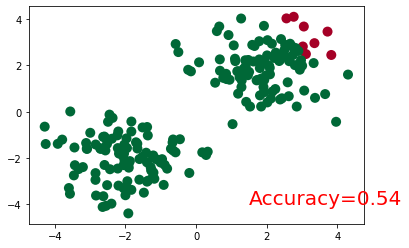

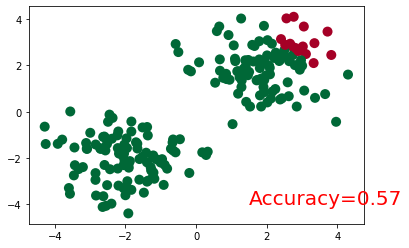

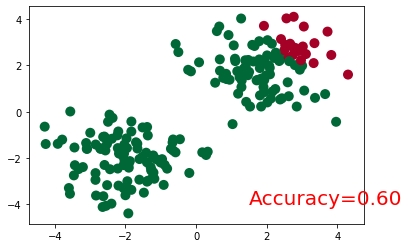

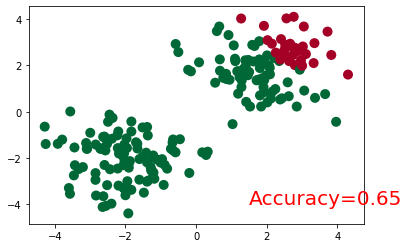

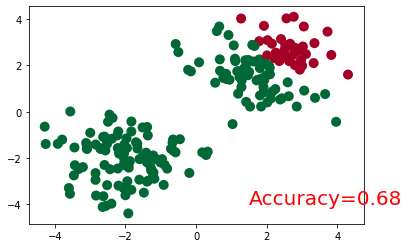

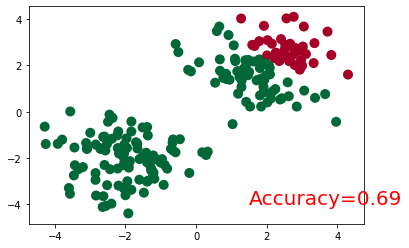

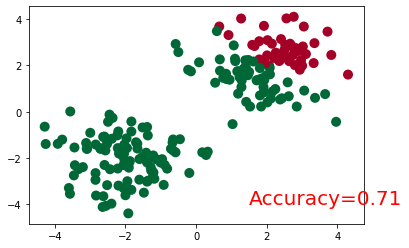

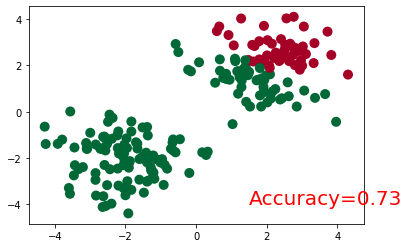

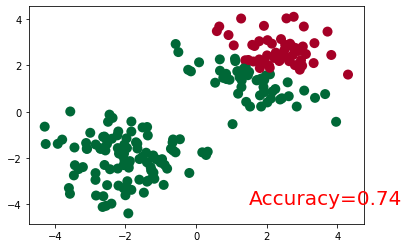

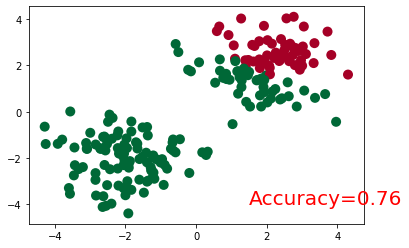

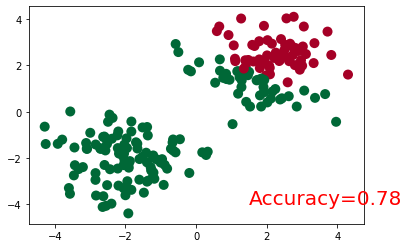

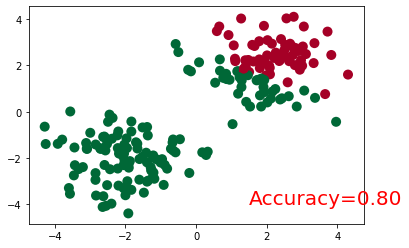

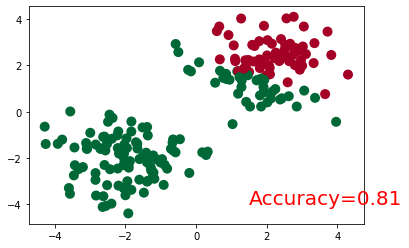

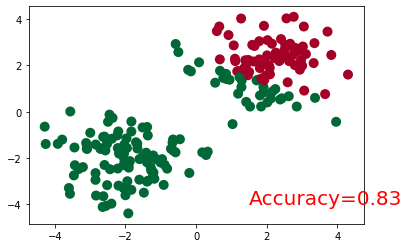

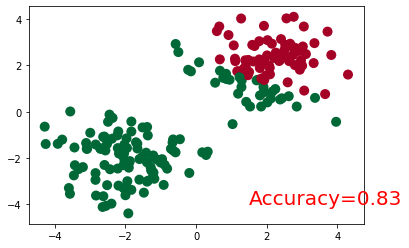

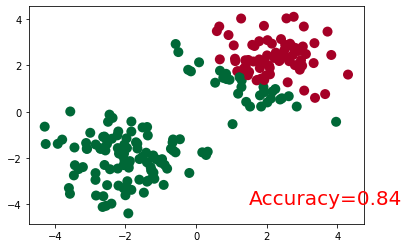

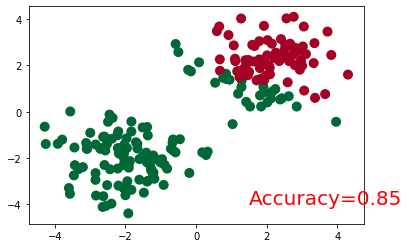

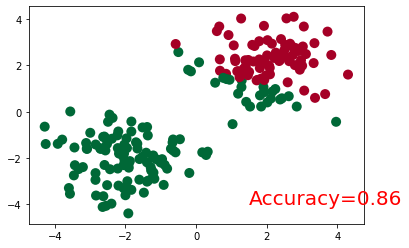

In [8]:
# optimizer用来训练
optimizer = torch.optim.SGD(net.parameters(),lr=0.002) #传入net的参数和learningrate
lossF = torch.nn.CrossEntropyLoss() #classification使用crossentropyloss,输出的是概率


for t in range(100):
    out = net(x) #把training set喂给net
    loss= lossF(out,y) #计算预测值和真实值的误差

    optimizer.zero_grad()#清空上一次循环的参数值
    loss.backward() #误差反向传播，计算参数更新值
    optimizer.step() #将参数更新值添加到net的参数上

    if t%2==0:#每两步出一个图
        plt.cla()
        #过了一道softmax的激励函数后的最大概率才是预测值
        prediction=torch.max(F.softmax(out),1)[1]  #通过softmax转换成概率，prediction是索引位置
        pred_y=prediction.data.numpy().squeeze()
        target_y=y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        acc=sum(pred_y==target_y)/200.   #预测值有多少和真实值一样
        plt.text(1.5,-4,'Accuracy=%.2f'%acc,fontdict={'size':20,'color':'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()